Abhay Singh

Email: abhay.s-26@scds.saiuniversity.edu.in

School of Computing and Data Science

### Hutton Rock Dataset

####Total Number of images: 505

- The number of images in granite class are: 187
- The number of images in basalt class are: 130
- The number of images in coal class are: 85
- The number of images in andesite class are: 103

###378 images are used for trining and 127 images are used for testing.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import tensorflow as tf
print(tf.__version__)

from tensorflow import keras
tf.random.set_seed(42)

import numpy as np
np.random.seed(42)

import matplotlib.pyplot as plt
%matplotlib inline

import glob
import PIL
from PIL import Image

2.17.1


In [3]:
from numpy import load

X_train_std = load('/content/drive/MyDrive/DLPROJECT/X_train_std.npy')
X_test_std = load('/content/drive/MyDrive/DLPROJECT/X_test_std.npy')

y_train = load('/content/drive/MyDrive/DLPROJECT/y_train.npy')
y_test = load('/content/drive/MyDrive/DLPROJECT/y_test.npy')

In [6]:
DenseNet201=keras.applications.DenseNet201(weights='imagenet',
                                           input_shape = (299,299,3),
                                           include_top=False,
)

In [7]:


DenseNet201.trainable = False
for layer in DenseNet201.layers:
  layer.trainabe = False

In [8]:
# Adding classifier

global_pool = keras.layers.GlobalAveragePooling2D()(DenseNet201.output)

Layer_Normalization = keras.layers.BatchNormalization()(global_pool)
Drop_out = keras.layers.Dropout(rate=0.35)(Layer_Normalization)

output_ = keras.layers.Dense(units=4, activation='softmax')(Drop_out)


model2_TL = keras.models.Model(inputs=[DenseNet201.input], outputs=[output_])

In [9]:
model2_TL.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 299, 299, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ zero_padding2d_2          │ (None, 305, 305, 3)    │              0 │ input_layer_1[0][0]    │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 150, 150, 64)   │          9,408 │ zero_padding2d_2[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 150, 150, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 150, 150, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ zero_padding2d_3          │ (None, 152, 152, 64)   │              0 │ conv1_relu[0][0]       │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1 (MaxPooling2D)      │ (None, 75, 75, 64)     │              0 │ zero_padding2d_3[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_bn         │ (None, 75, 75, 64)     │            256 │ pool1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_relu       │ (None, 75, 75, 64)     │              0 │ conv2_block1_0_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 75, 75, 128)    │          8,192 │ conv2_block1_0_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 75, 75, 128)    │            512 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 75, 75, 128)    │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 75, 75, 32)     │         36,864 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_concat       │ (None, 75, 75, 96)     │              0 │ pool1[0][0],           │
│ (Concatenate)             │                        │                │ conv2_block1_2_conv[0… │
├──────────────────────

 Total params: 18,337,348 (69.95 MB)

 Trainable params: 11,524 (45.02 KB)

 Non-trainable params: 18,325,824 (69.91 MB)

In [10]:
model2_TL.compile(loss='sparse_categorical_crossentropy',
                 optimizer='adam',
                 metrics=['accuracy'])

callbacks_TL = [
             keras.callbacks.ModelCheckpoint("bestTL2.weights.h5",
                                             monitor='val_accuracy',
                                             save_weights_only=True,
                                             save_best_only=True)]

history_TL2 = model2_TL.fit(x = X_train_std, y = y_train, epochs=10,
                          validation_split=0.1, batch_size=16, callbacks=callbacks_TL)

Epoch 1/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 101s 3s/step - accuracy: 0.4219 - loss: 1.3929 - val_accuracy: 0.5128 - val_loss: 1.0032
Epoch 2/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 6s 116ms/step - accuracy: 0.7175 - loss: 0.6874 - val_accuracy: 0.4615 - val_loss: 0.8997
Epoch 3/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 5s 119ms/step - accuracy: 0.8084 - loss: 0.5112 - val_accuracy: 0.5128 - val_loss: 0.7747
Epoch 4/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 4s 199ms/step - accuracy: 0.8442 - loss: 0.4057 - val_accuracy: 0.6667 - val_loss: 0.7040
Epoch 5/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 121ms/step - accuracy: 0.8639 - loss: 0.3601 - val_accuracy: 0.6667 - val_loss: 0.6893
Epoch 6/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 6s 171ms/step - accuracy: 0.8780 - loss: 0.3179 - val_accuracy: 0.7436 - val_loss: 0.6533
Epoch 7/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 121ms/step - accuracy: 0.8892 - loss: 0.2948 - val_accuracy: 0.7179 - val_loss: 0.6423
Epoch 8/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 5s 120ms/step - accuracy: 0.9160 - loss: 0.2545 - val_accuracy: 0.7

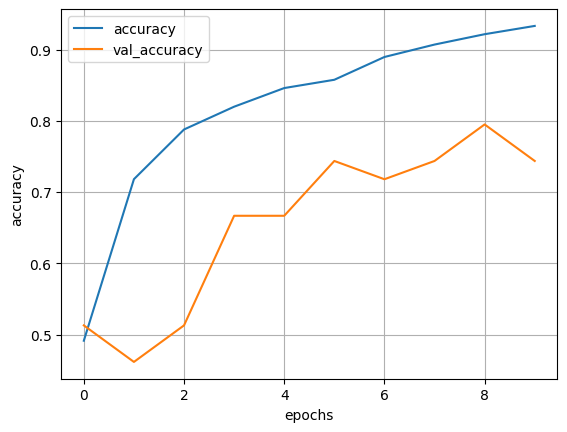

In [11]:
keys = ['accuracy', 'val_accuracy']
progress = {k:v for k,v in history_TL2.history.items() if k in keys}

import pandas as pd
pd.DataFrame(progress).plot()

plt.xlabel("epochs")
plt.ylabel("accuracy")

plt.grid(True)
plt.show()

In [12]:
model2_TL.load_weights("bestTL2.weights.h5")

In [13]:
model2_TL.save('/content/drive/MyDrive/DLPROJECT/01_DenseNet201_TransferLearning_Best_Model.keras')